In [312]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score

In [818]:
# import dataset
df = pd.read_csv('ultimate_complete_dataset.csv')

In [819]:
df


,Unnamed: 0,State,LGA,ward,WardCode,geometry,Target,Number_of_public_water_supply,Number_of_markets,Number_of_dump_sites,area,avg_distance_btw_dumpsites_&_water_sources,avg_distance_btw_markets_&_dumpsites,avg_distance_btw_markets_&_water_sources
0,0,Abia,Umuahia South,Ubakala A,ABSAPR12,"POLYGON ((329878.1262163264 606239.8255526555,...",1,17,5,3,2.495595e+07,2228.902305,686355.433372,688063.337370
1,1,Katsina,Kankia,Rimaye,42007,"POLYGON ((377863.41048887 1352701.6666771427, ...",1,0,1,0,8.149431e+07,0.000000,0.000000,0.000000
2,2,Katsina,Kankia,Tsa Magam,42010,MULTIPOLYGON (((355262.80298729794 1364164.364...,1,0,0,0,1.193838e+08,0.000000,0.000000,0.000000
3,3,Katsina,Kankia,Tafashiya Nasarawa,42009,POLYGON ((370876.73744022794 1385994.233151217...,1,0,0,0,6.914710e+07,0.000000,0.000000,0.000000
4,4,Katsina,Kankia,Sukuntuni,42008,POLYGON ((369443.3732105175 1355918.6256621734...,1,0,0,0,6.767949e+07,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1036,Ogun,Yewa North,Ijoun,OGSYEN07,POLYGON ((-190197.73653195123 813910.880862065...,0,7,2,8,3.896691e+08,12258.199760,827874.734589,825165.705322
1037,1037,Ogun,Yewa North,Igbogila / Ibese,OGSYEN06,POLYGON ((-158152.07493233902 771693.527017512...,0,1,0,3,1.623994e+08,12232.806922,0.000000,0.000000
1038,1038,Ogun,Yewa North,Sunwa,OGSYEN11,POLYGON ((-169938.02385707898 792979.349161201...,0,4,3,15,2.698987e+08,12070.320915,818847.081765,812723.516118
1039,1039,Ogun,Imeko Afon,Imeko,OGSION07,POLYGON ((-177263.51506377058 833753.721887157...,0,14,2,19,1.005402e+08,2369.499677,847787.535338,847452.264997


In [820]:
df.drop(columns='Unnamed: 0', inplace = True)

In [821]:
# remove observations that have no public water supply and dumpsite simultaneously
df5 = df[~((df['Number_of_public_water_supply']==0)&(df['Number_of_dump_sites']==0))]

In [822]:
df5.reset_index(drop= True, inplace = True)

In [823]:
df27 = df5.copy()

In [824]:
df27.columns

Index(['State', 'LGA', 'ward', 'WardCode', 'geometry', 'Target',
       'Number_of_public_water_supply', 'Number_of_markets',
       'Number_of_dump_sites', 'area',
       'avg_distance_btw_dumpsites_&_water_sources',
       'avg_distance_btw_markets_&_dumpsites',
       'avg_distance_btw_markets_&_water_sources'],
      dtype='object')

In [833]:
df27.columns = ['State','LGA','ward',
                'WardCode','geometry','Target',
                'Number of public water sources','Number of markets',
                'Number of dump sites','Ward Size',
                'avg distance btw dumpsites & water sources','avg distance btw markets & dumpsites',
                'avg distance btw markets & water sources']

In [834]:
df27

,State,LGA,ward,WardCode,geometry,Target,Number of public water sources,Number of markets,Number of dump sites,Ward Size,avg distance btw dumpsites & water sources,avg distance btw markets & dumpsites,avg distance btw markets & water sources
0,Abia,Umuahia South,Ubakala A,ABSAPR12,"POLYGON ((329878.1262163264 606239.8255526555,...",1,17,5,3,2.495595e+07,2228.902305,6.863554e+05,688063.337370
1,Fct,Gwagwalada,Ibwa,FCTGWA04,POLYGON ((283669.2063095177 1023823.4112232431...,1,3,0,0,2.382906e+08,0.000000,0.000000e+00,0.000000
2,Gombe,Akko,Garko,GMSAKK02,"POLYGON ((743069.916459434 1129641.7687575428,...",1,0,10,4,1.856818e+08,0.000000,1.355111e+06,0.000000
3,Gombe,Yamaltu/Deba,Deba,GMSYDB01,POLYGON ((763513.1580586915 1138125.5483323734...,1,0,2,1,1.974610e+08,0.000000,1.367423e+06,0.000000
4,Gombe,Gombe,Shamaki,GMSGME11,POLYGON ((739399.2876564058 1140714.2529448743...,1,0,5,15,1.376536e+07,0.000000,1.357683e+06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Ogun,Yewa North,Joga / Iboro,OGSYEN09,POLYGON ((-153592.1621136712 781794.1433346026...,0,3,4,1,8.474524e+07,2874.288762,8.027674e+05,800017.544317
397,Ogun,Yewa North,Ijoun,OGSYEN07,POLYGON ((-190197.73653195123 813910.880862065...,0,7,2,8,3.896691e+08,12258.199760,8.278747e+05,825165.705322
398,Ogun,Yewa North,Igbogila / Ibese,OGSYEN06,POLYGON ((-158152.07493233902 771693.527017512...,0,1,0,3,1.623994e+08,12232.806922,0.000000e+00,0.000000
399,Ogun,Yewa North,Sunwa,OGSYEN11,POLYGON ((-169938.02385707898 792979.349161201...,0,4,3,15,2.698987e+08,12070.320915,8.188471e+05,812723.516118


In [835]:
df28 = df27.copy()

Text(0.5, 1.0, 'distribution of number of public water sources against cholera cases')

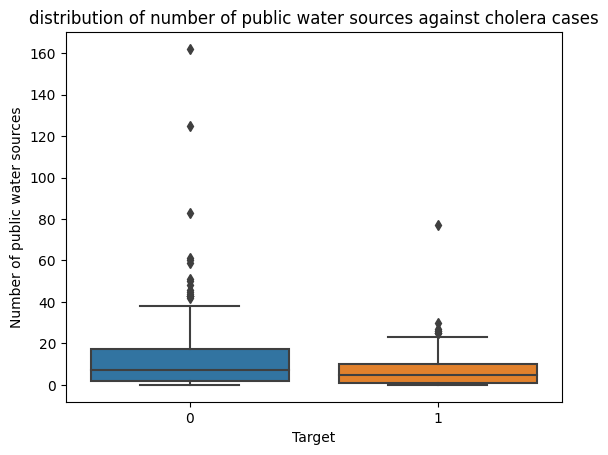

In [836]:
ax =sns.boxplot(x='Target', y='Number of public water sources', data=df28)
ax.set_title('distribution of number of public water sources against cholera cases')

<Axes: xlabel='Target', ylabel='Number of dump sites'>

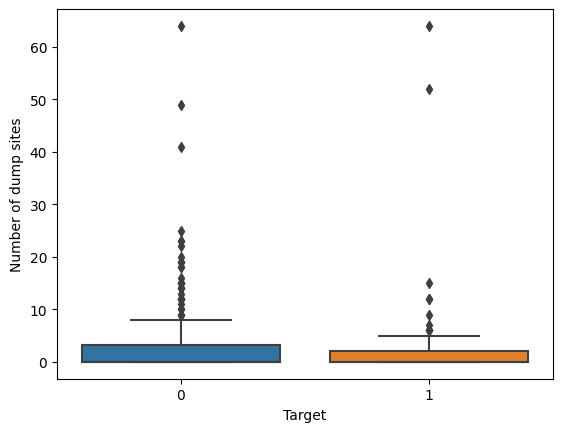

In [837]:
sns.boxplot(x='Target', y='Number of dump sites', data=df28)

Text(0.5, 1.0, 'distribution of the number of markets  against cholera cases')

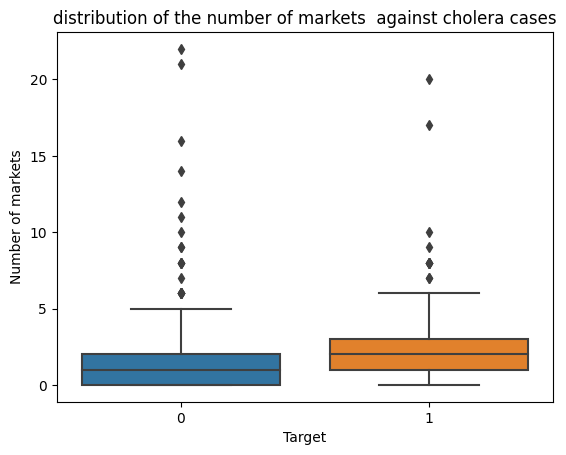

In [838]:
ax = sns.boxplot(x='Target', y='Number of markets', data=df28)
ax.set_title('distribution of the number of markets  against cholera cases')

Text(0.5, 1.0, 'distribution of average distance between dumpsites & water sources against cholera cases')

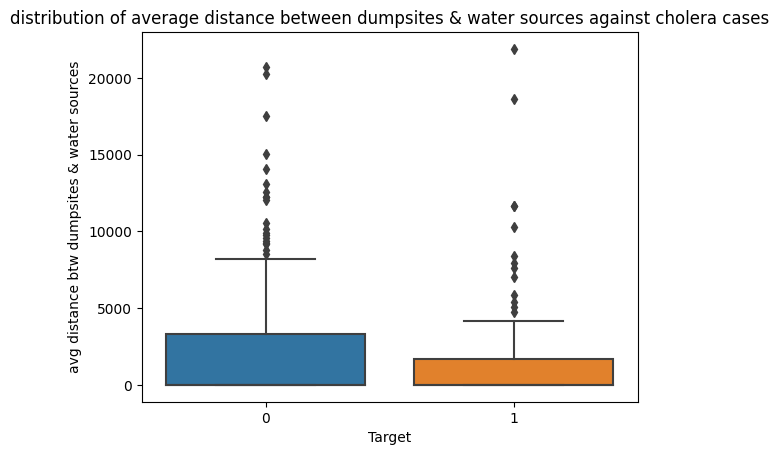

In [839]:
ax = sns.boxplot(x='Target', y='avg distance btw dumpsites & water sources', data=df28)
ax.set_title('distribution of average distance between dumpsites & water sources against cholera cases')

<Axes: xlabel='Target', ylabel='avg distance btw markets & dumpsites'>

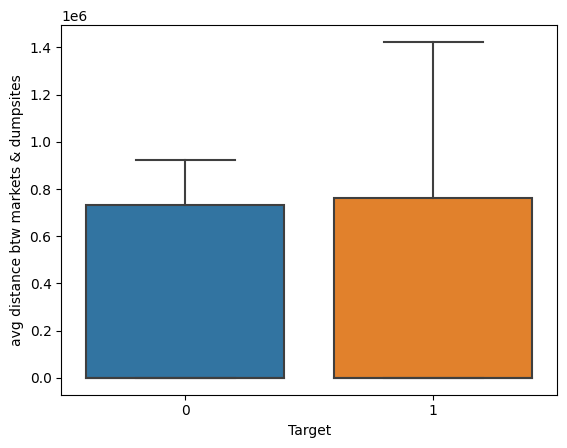

In [840]:
sns.boxplot(x='Target', y='avg distance btw markets & dumpsites', data=df28)

Text(0.5, 1.0, 'The distribution of the average distance between markets and publiic water sources')

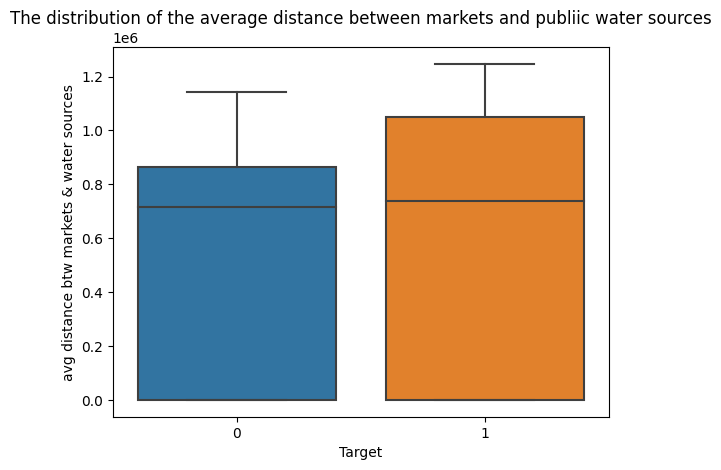

In [841]:
ax = sns.boxplot(x='Target', y='avg distance btw markets & water sources', data=df28)
ax.set_title('The distribution of the average distance between markets and publiic water sources') 

array([[<Axes: title={'center': 'Target'}>,
        <Axes: title={'center': 'Number of public water sources'}>],
       [<Axes: title={'center': 'Number of markets'}>,
        <Axes: title={'center': 'Number of dump sites'}>],
       [<Axes: title={'center': 'Ward Size'}>,
        <Axes: title={'center': 'avg distance btw dumpsites & water sources'}>],
       [<Axes: title={'center': 'avg distance btw markets & dumpsites'}>,
        <Axes: title={'center': 'avg distance btw markets & water sources'}>]],
      dtype=object)

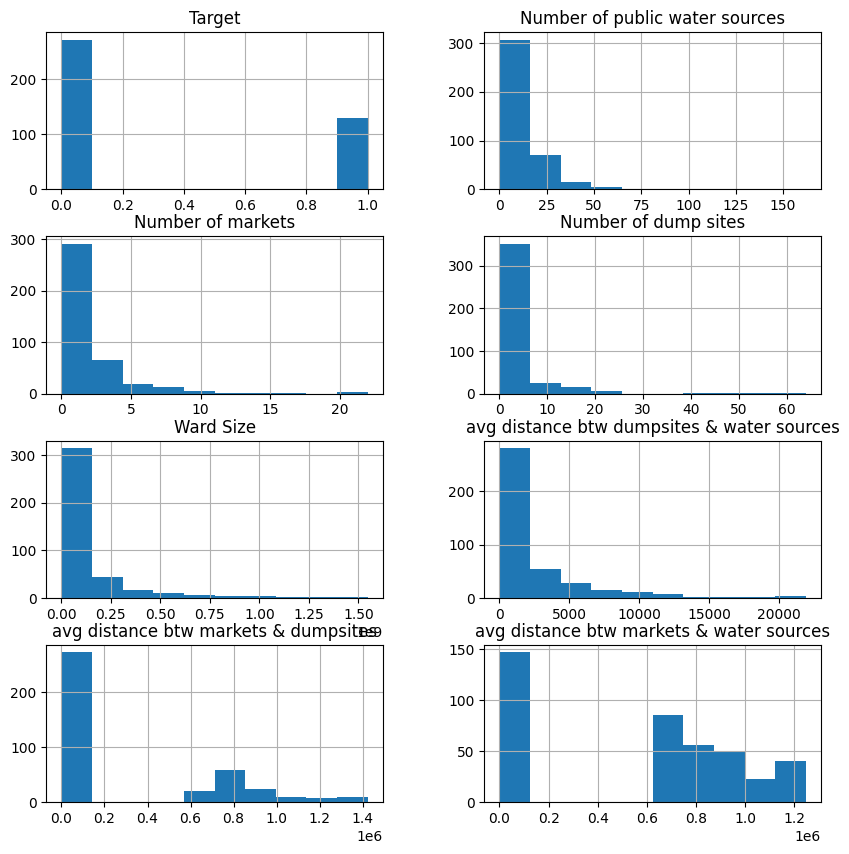

In [842]:
df27.hist(layout=(4, 2), figsize=(10,10))

In [843]:
def column_regplots_with_target(dataframe, target_column):
    num_columns = len(dataframe.columns) - 1  # Excluding the first column
    num_rows = (num_columns - 1) // 7 + 1

    fig, axes = plt.subplots(2, 4, figsize=(20, 20))
    
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    for index, column in enumerate(dataframe.columns[1:]):  # Excluding the first column
        if column != target_column:
            row = index // 7
            col = index % 7
            ax = axes[row, col]
            
            sns.regplot(data=dataframe, x=column, y=target_column, ax=ax)
            ax.set_title(f'{column} vs {target_column}')
    
    plt.tight_layout()
    plt.show()

In [845]:
df20 = df28[['Target','Number of public water sources','Number of markets','Number of dump sites','Ward Size','avg distance btw dumpsites & water sources','avg distance btw markets & dumpsites','avg distance btw markets & water sources']]

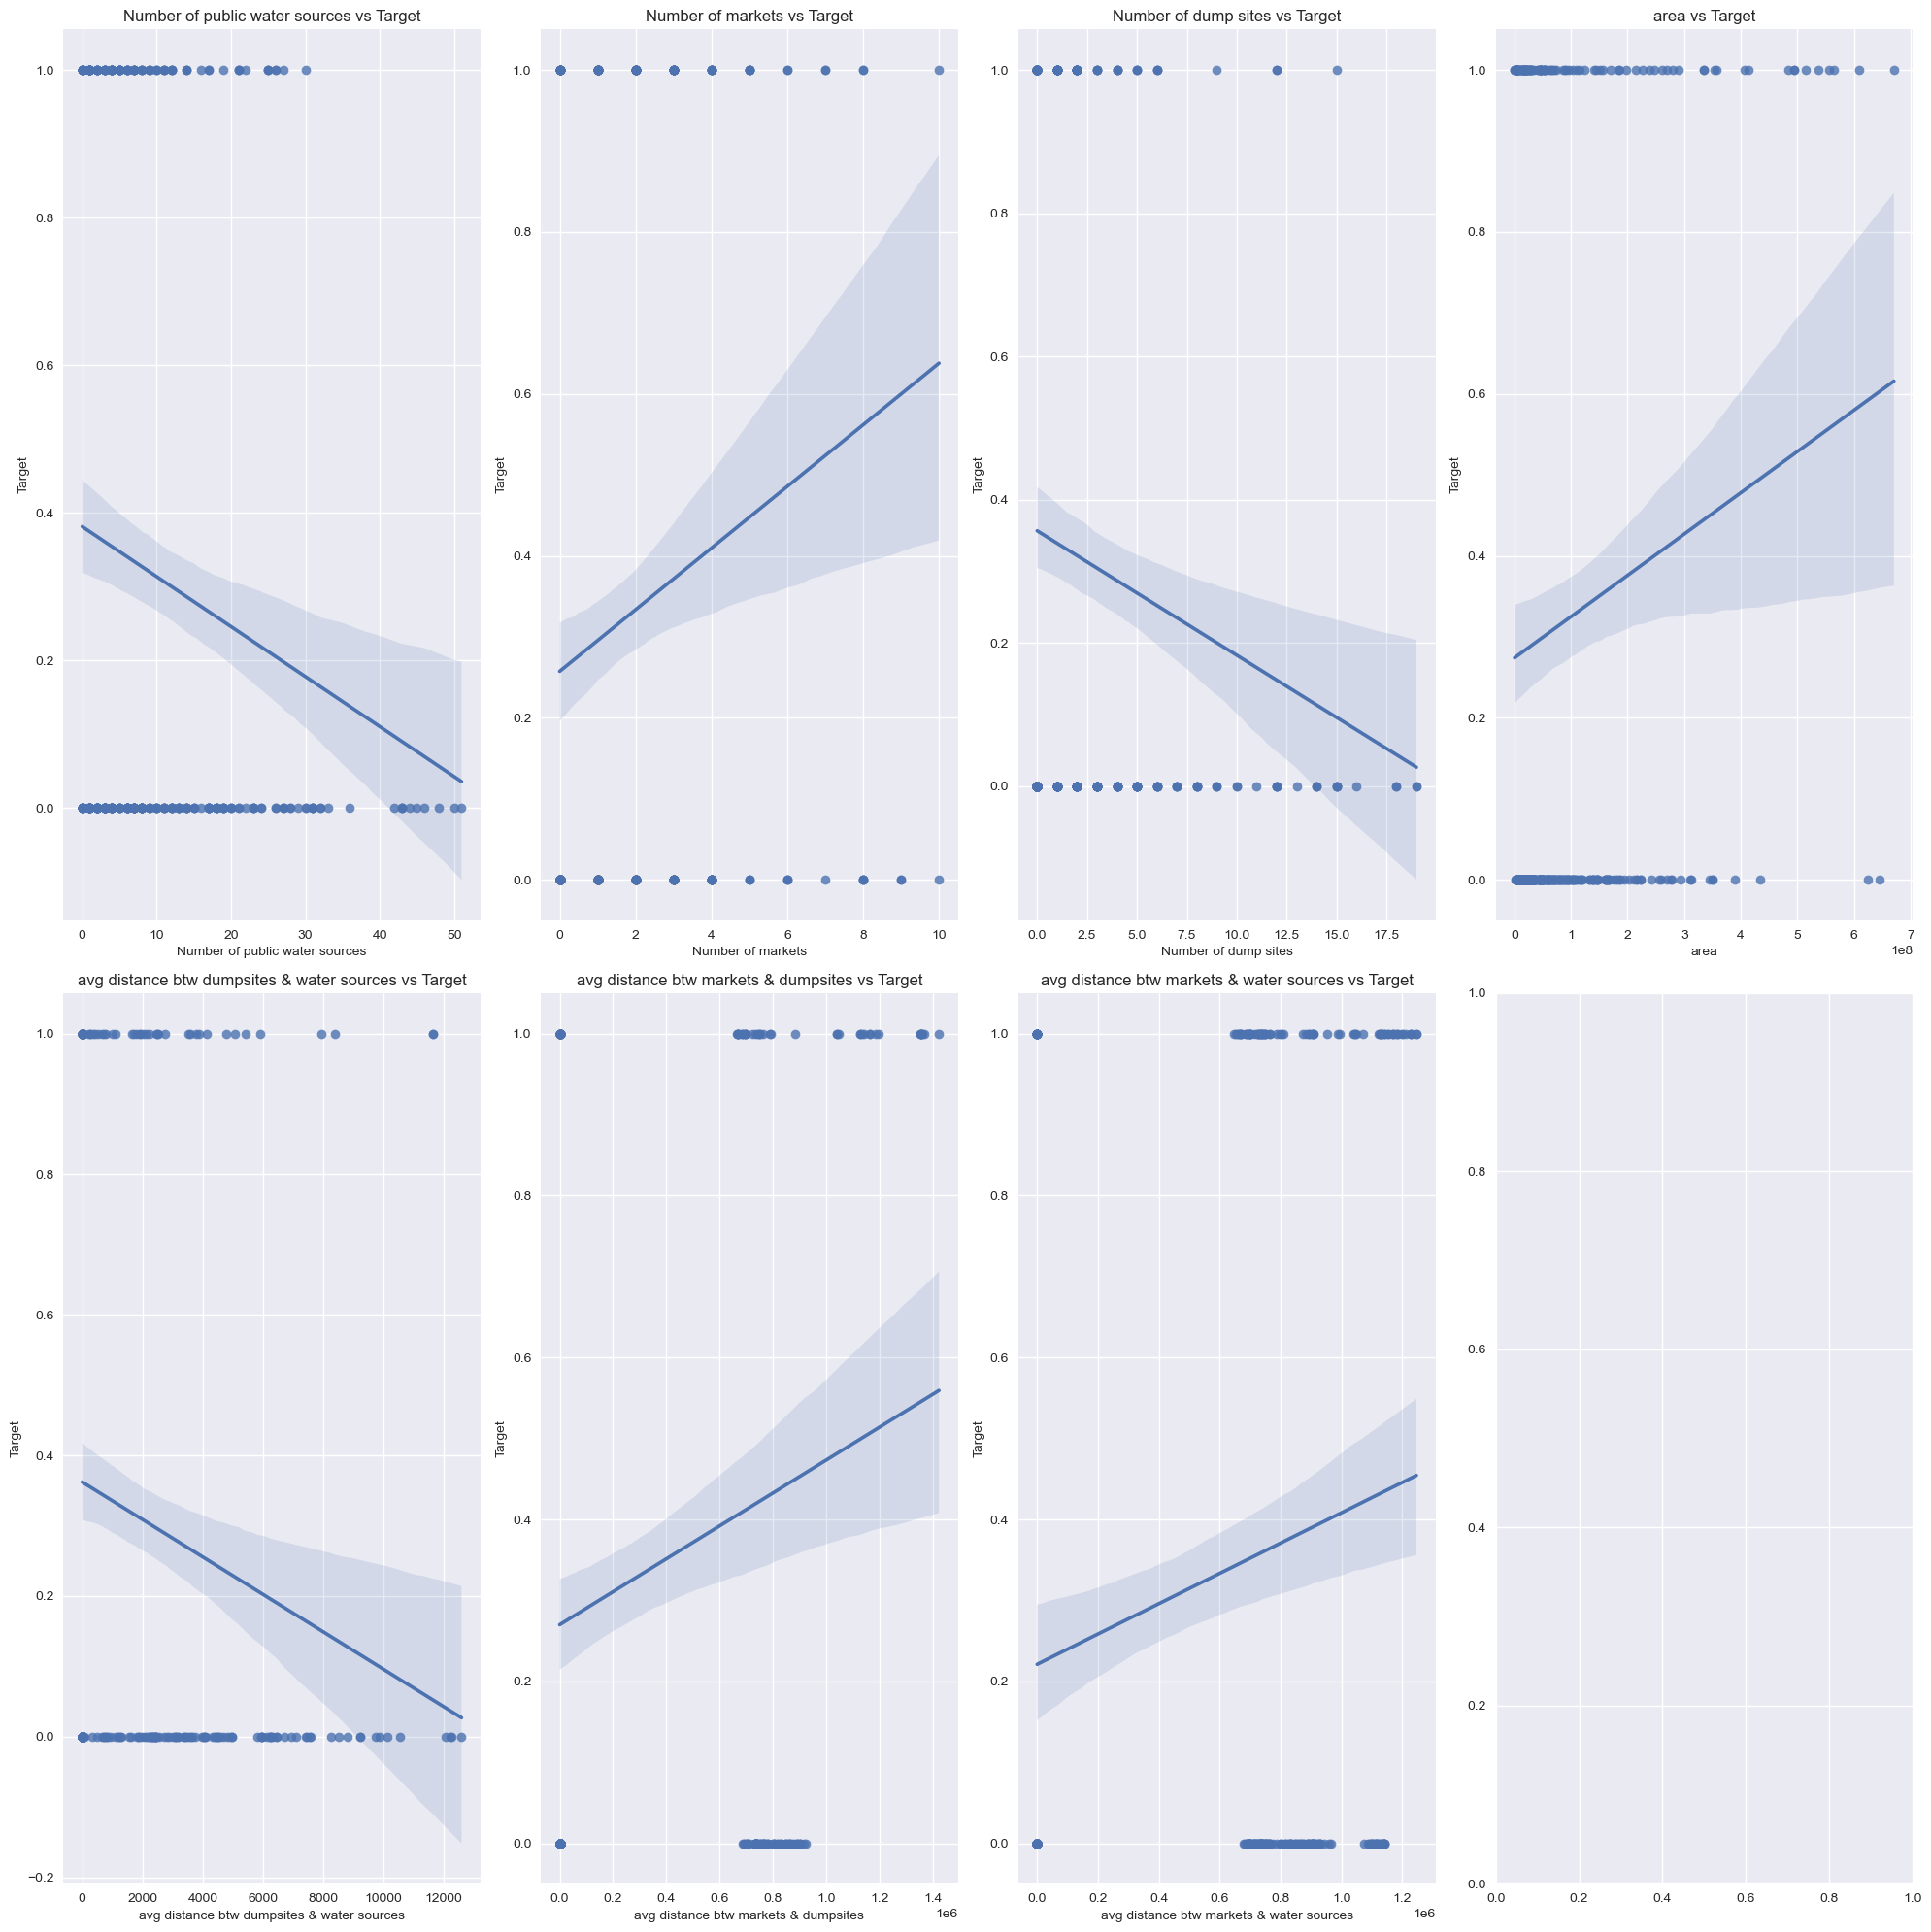

In [792]:
column_regplots_with_target(df20, 'Target')

In [849]:
def correlation_heatmap(dataframe):
    # Select only numeric columns
    dataframe_numeric = dataframe.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = dataframe_numeric.corr()
    
    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

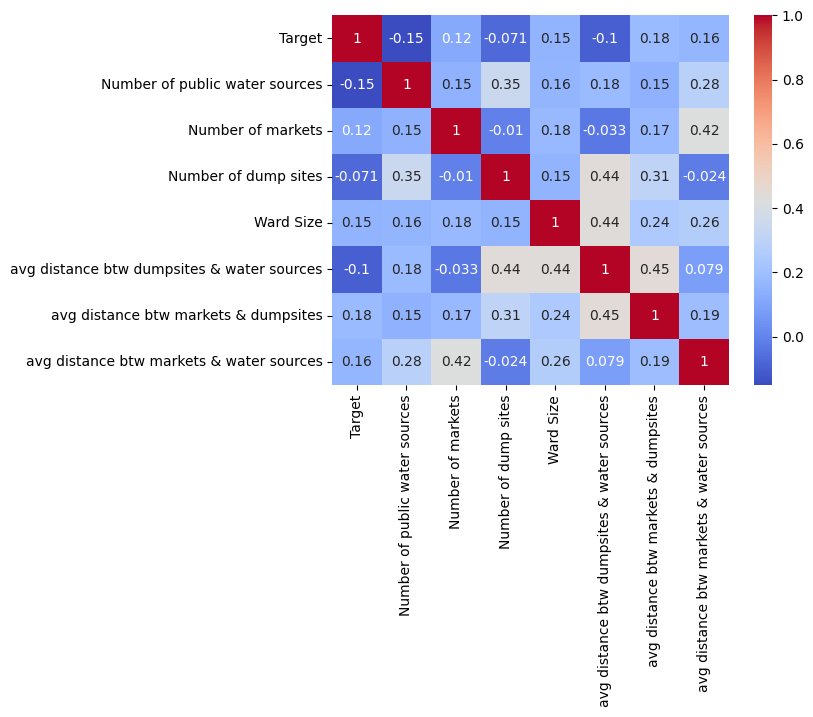

In [851]:
correlation_heatmap(df28)

<Axes: xlabel='area', ylabel='avg_distance_btw_dumpsites_&_water_sources'>

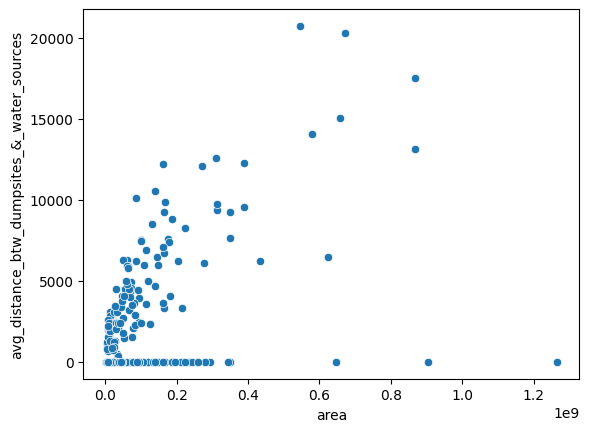

In [62]:
sns.scatterplot(data=df2[df2['Target']==0], x='area', y='avg_distance_btw_dumpsites_&_water_sources')

In [542]:
df7 = df27.copy()

In [852]:
df8 = df7[['Number of public water sources','Number of markets','Number of dump sites','Ward Size','avg distance btw dumpsites & water sources','avg distance btw markets & dumpsites',
           'avg distance btw markets & water sources']]

In [853]:
df8

,Number of public water sources,Number of markets,Number of dump sites,Ward Size,avg distance btw dumpsites & water sources,avg distance btw markets & dumpsites,avg distance btw markets & water sources
0,3,0,0,2.382906e+08,0.000000,0.000000e+00,0.0
1,0,10,4,1.856818e+08,0.000000,1.355111e+06,0.0
2,0,2,1,1.974610e+08,0.000000,1.367423e+06,0.0
3,0,5,15,1.376536e+07,0.000000,1.357683e+06,0.0
4,11,0,0,6.626509e+07,0.000000,0.000000e+00,0.0
...,...,...,...,...,...,...,...
396,8,0,1,1.780966e+07,837.850636,0.000000e+00,0.0
397,0,0,1,4.334585e+07,0.000000,0.000000e+00,0.0
398,5,0,2,8.553783e+07,6250.495038,0.000000e+00,0.0
399,3,0,0,1.317046e+07,0.000000,0.000000e+00,0.0


In [854]:
df8.reset_index(drop=True,inplace=True)

In [746]:
# create normalization function
scaler = MinMaxScaler()

In [783]:
df8.drop(columns =['Number of dump sites','Number of markets'], inplace = True)

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_6088/2155197245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(columns =['Number of dump sites','Number of markets'], inplace = True)


In [855]:
df8[['Number of public water sources','Ward Size','avg distance btw dumpsites & water sources',
     'avg distance btw markets & dumpsites','avg distance btw markets & water sources']] = scaler.fit_transform(df8[['Number of public water sources','Ward Size',
                          'avg distance btw dumpsites & water sources',
                          'avg distance btw markets & dumpsites','avg distance btw markets & water sources']])

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_6088/1168285500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8[['Number of public water sources','Ward Size','avg distance btw dumpsites & water sources',


In [856]:
df8

,Number of public water sources,Number of markets,Number of dump sites,Ward Size,avg distance btw dumpsites & water sources,avg distance btw markets & dumpsites,avg distance btw markets & water sources
0,0.018519,0,0,0.153822,0.000000,0.000000,0.0
1,0.000000,10,4,0.119802,0.000000,0.952074,0.0
2,0.000000,2,1,0.127419,0.000000,0.960724,0.0
3,0.000000,5,15,0.008632,0.000000,0.953881,0.0
4,0.067901,0,0,0.042581,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
396,0.049383,0,1,0.011247,0.038259,0.000000,0.0
397,0.000000,0,1,0.027760,0.000000,0.000000,0.0
398,0.030864,0,2,0.055044,0.285418,0.000000,0.0
399,0.018519,0,0,0.008247,0.000000,0.000000,0.0


In [859]:
df7.reset_index(drop=True, inplace=True)

In [860]:
df9 =  df7[['Target']]

In [861]:
# convert boolean values to numeric values
def convert(x):
    if x==True:
        return 1
    else:
        return 0

In [862]:
df9['Target'] = df9['Target'].apply(convert)

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_6088/3713658263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Target'] = df9['Target'].apply(convert)


In [863]:
df9

,Target
0,1
1,1
2,1
3,1
4,1
...,...
396,0
397,0
398,0
399,0


In [1052]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df8, df9, test_size=0.33, random_state=55)

In [1053]:
X_train

,Number of public water sources,Number of markets,Number of dump sites,Ward Size,avg distance btw dumpsites & water sources,avg distance btw markets & dumpsites,avg distance btw markets & water sources
232,0.024691,0,0,0.030060,0.000000,0.000000,0.000000
56,0.012346,0,0,0.003960,0.000000,0.000000,0.000000
107,0.012346,5,0,0.036700,0.000000,0.000000,0.565608
108,0.043210,0,0,0.061860,0.000000,0.000000,0.000000
222,0.012346,0,0,0.013654,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
311,0.006173,2,0,0.001411,0.000000,0.000000,0.571910
29,0.074074,1,0,0.332226,0.000000,0.000000,0.918109
381,0.037037,0,0,0.028541,0.000000,0.000000,0.000000
295,0.030864,1,9,0.004755,0.082492,0.526011,0.600708


In [1054]:
# perform training and crossvalidation for three different models.

# Define a parameter grid for the decision tree classifier
param_grid1 =  {'n_estimators': [10,15,20,25,60,25], 'max_depth': [10,50,25,50]}
param_grid2 = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
param_grid3 = {'max_depth': [2, 5,10,20,50], 'min_samples_split': [2, 5, 10,50]}

# Create a decision tree classifier
clf1 = RandomForestClassifier(random_state=0)
clf2 = LogisticRegression(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)


#Perform a grid search with 5-fold cross-validation
grid_search1 = GridSearchCV(clf1, param_grid1, cv=5)
grid_search2 = GridSearchCV(clf2, param_grid2, cv=5)
grid_search3 = GridSearchCV(clf3, param_grid3, cv=5)

grid_search1.fit(X_train, y_train)
grid_search2.fit(X_train, y_train)
grid_search3.fit(X_train, y_train)

# Retrain the optimal model on the entire dataset
best_clf1 = grid_search1.best_estimator_
best_clf2 = grid_search2.best_estimator_
best_clf3 = grid_search3.best_estimator_

best_clf1.fit(X_train, y_train)
best_clf2.fit(X_train, y_train)
best_clf3.fit(X_train, y_train)

/Users/macbookair/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookair/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookair/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookair/anaconda3/envs/ML/lib/python3.10/site-packages

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_6088/385175365.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_clf1.fit(X_train, y_train)
/Users/macbookair/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(max_depth=2, random_state=0)

# Evaluating the Random Forest Classifier model

In [1055]:
# gets the prediction probabilities
probs = best_clf1.predict_proba(X_test)

In [1093]:
# sets the prediction probability threshold to
threshold = 0.41

In [1094]:
y_pred = (probs[:, 1] >= threshold).astype(int)

In [1095]:
cm = confusion_matrix(y_test, y_pred)

In [1096]:
cm

array([[72, 15],
       [13, 33]])

In [1097]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7894736842105263


In [1098]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.702127659574468

In [1099]:
precision

0.6875

In [1100]:
recall


0.717391304347826

# Evaluating the Logistic regression classifier

In [1101]:
probs = best_clf2.predict_proba(X_test)

In [1102]:
threshold = 0.5

In [1103]:
y_pred = (probs[:, 1] >= threshold).astype(int)

In [1104]:
cm = confusion_matrix(y_test, y_pred)

In [1105]:
cm

array([[84,  3],
       [32, 14]])

In [1106]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7368421052631579


In [1107]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.4444444444444444

In [1108]:
precision

0.8235294117647058

In [1109]:
recall

0.30434782608695654

# evaluating the Decision tree classifier

In [1110]:
probs = best_clf3.predict_proba(X_test)

In [1111]:
threshold = 0.5

In [1112]:
y_pred = (probs[:, 1] >= threshold).astype(int)

In [1113]:
cm = confusion_matrix(y_test, y_pred)

In [1114]:
cm

array([[87,  0],
       [28, 18]])

In [1115]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7894736842105263


In [1116]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.5625

In [1117]:
precision

1.0

In [1118]:
recall

0.391304347826087

# Plotting the ROC-AUC Curve for the different models

In [1119]:
# probability prediction for random forest classifier
probs1 = best_clf1.predict_proba(X_test)

In [1120]:
# probability prediction for Logistic regression classifier
Probs2 = best_clf2.predict_proba(X_test)

In [1121]:
# probability prediction for Decision tree classifier
Probs3 = best_clf3.predict_proba(X_test)

In [1122]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, probs1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, Probs2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, Probs3[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_6088/3467540580.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


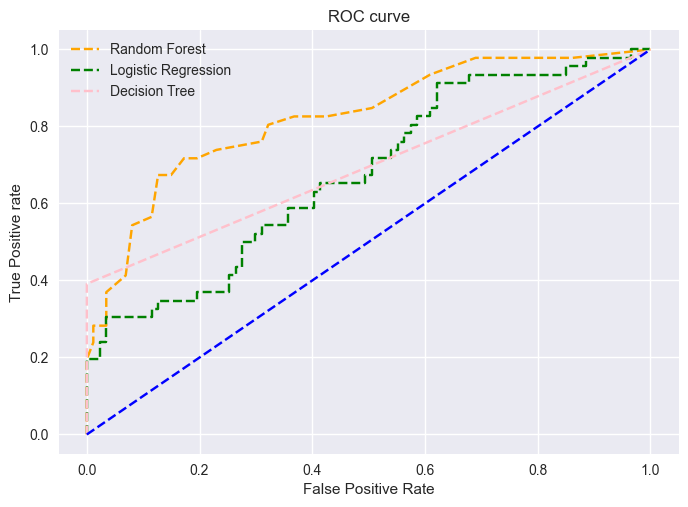

In [1124]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='Green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='Pink', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [1129]:
# auc scores
auc_score1 = roc_auc_score(y_test, probs1[:,1])
auc_score2 = roc_auc_score(y_test, Probs2[:,1])
auc_score3 = roc_auc_score(y_test, Probs3[:,1])
print("the AUC score for Random Forest is :", auc_score1)
print("The AUC score for Logistic Regression is :", auc_score2)
print("the AUC score for Decision tree is :", auc_score3)

the AUC score for Random Forest is : 0.8232133933033483
The AUC score for Logistic Regression is : 0.6761619190404798
the AUC score for Decision tree is : 0.6956521739130435


In [40]:
feature_importances = pd.Series(best_clf1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Text(0.5, 0, 'Impotance score')

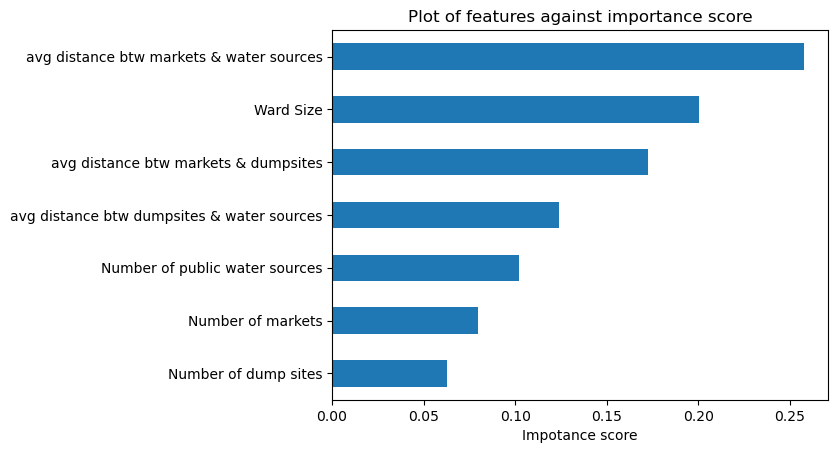

In [41]:
feature_importances = feature_importances.sort_values(ascending=True)
ax=feature_importances.plot.barh();
ax.set_title('Plot of features against importance score')
ax.set_xlabel('Impotance score')
